## Statsmodel Arima
aluno: Joel Campos Teixeira

In [5]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
# exemplos series temporais
np.random.seed(0) # criando um numero semente
dat =np.random.randn(100).cumsum() # criando valores ficticios
dates = pd.date_range('01-01-2023',periods=100) # criando datas 
df = pd.DataFrame(dat,index=dates,columns=['valores']) # criando data frame e passando os valores

In [9]:
df

,valores
2023-01-01,1.764052
2023-01-02,2.164210
2023-01-03,3.142948
2023-01-04,5.383841
2023-01-05,7.251399
...,...
2023-04-06,3.655530
2023-04-07,3.666030
2023-04-08,5.451900
2023-04-09,5.578812


In [11]:
#Ajuste do modelo ARIMA
modelo =sm.tsa.ARIMA(df['valores'],order=(1,1,1)).fit()

# Exibir os dados do modelo
print(modelo.summary())

                               SARIMAX Results                                
Dep. Variable:                valores   No. Observations:                  100
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -139.082
Date:                Thu, 12 Dec 2024   AIC                            284.163
Time:                        12:13:43   BIC                            291.949
Sample:                    01-01-2023   HQIC                           287.313
                         - 04-10-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9450      0.082     11.491      0.000       0.784       1.106
ma.L1         -0.8819      0.115     -7.687      0.000      -1.107      -0.657
sigma2         0.9707      0.147      6.591      0.0

In [12]:
# Plotando as previsões

<Axes: >

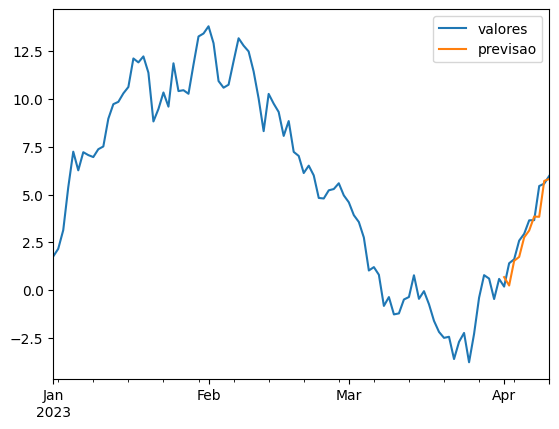

In [14]:
df['previsao']= modelo.predict( start=90, end= 110)
df[['valores','previsao']].plot()

In [15]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose

In [17]:
# exemplos series temporais
np.random.seed(0) # criando um numero semente
bas =np.random.randn(100).cumsum() * 10 * np.sin(np.linspace(0,3 * np.pi,100)) # criando valores ficticios
dates = pd.date_range('01-01-2023',periods=100) # criando datas 
df = pd.DataFrame(bas,index=dates,columns=['valores']) # criando data frame e passando os valores
df.head()

,valores
2023-01-01,0.000000
2023-01-02,2.057212
2023-01-03,5.948067
2023-01-04,15.168032
2023-01-05,26.950727


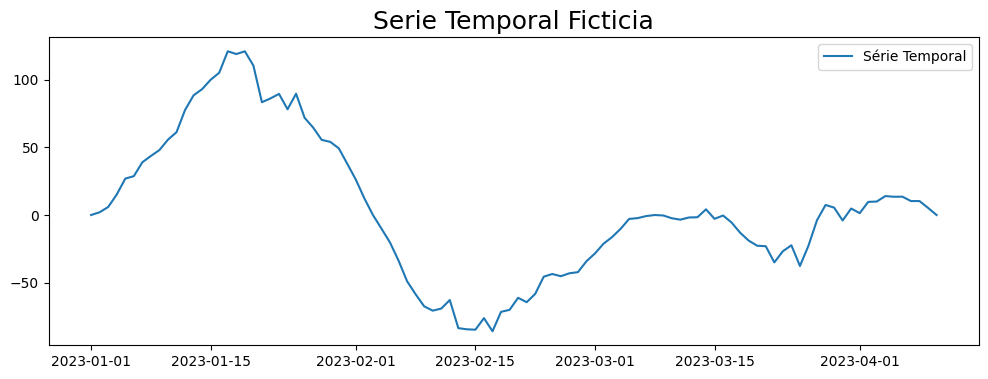

In [19]:
plt.figure(figsize=(12,4))
plt.plot(df,label='Série Temporal')
plt.title('Serie Temporal Ficticia',fontsize=18)
plt.legend()

## AJUSTAR O MODELO
Serie sem tendencia constante , ou seja sinnoides tem seu melhor uso com ARMA


In [20]:
arma_modelo = ARIMA(df['valores'],order=(1,0,1)) # especifica o modelo arma 
arma_fit = arma_modelo.fit() # ajustar o modelo aos dados

# aqui o sumario

print(arma_fit.summary())

# previsão com o modelo ARMA
arma_forecast = arma_fit.forecast(steps=20) # previsão para 20 periodos

                               SARIMAX Results                                
Dep. Variable:                valores   No. Observations:                  100
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -355.564
Date:                Thu, 12 Dec 2024   AIC                            719.128
Time:                        12:35:54   BIC                            729.548
Sample:                    01-01-2023   HQIC                           723.345
                         - 04-10-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0301     40.746      0.050      0.960     -77.830      81.890
ar.L1          0.9744      0.015     63.514      0.000       0.944       1.004
ma.L1          0.2019      0.087      2.331      0.0

In [21]:
# plotar a previsão

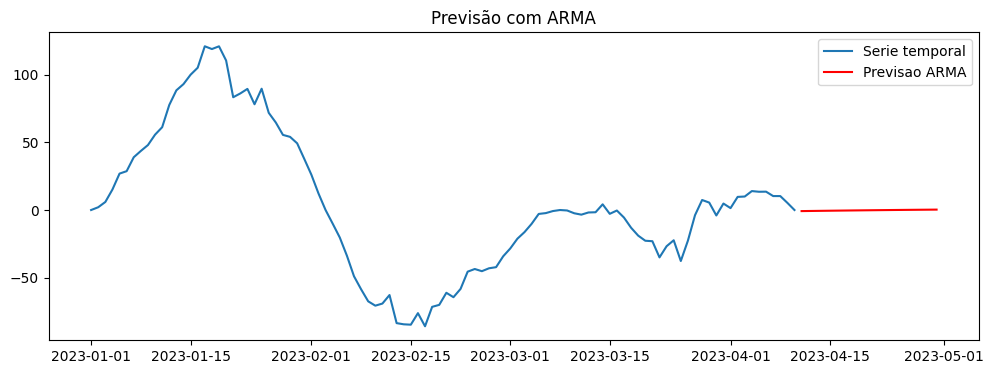

In [25]:
plt.figure(figsize=(12,4))
plt.plot(df,label='Serie temporal')
plt.plot(df.index[-1] + pd.to_timedelta(np.arange(1,21),'D'),arma_forecast, label='Previsao ARMA', color='red')
plt.title('Previsão com ARMA')
plt.legend()

In [26]:
# DECOMPOSIÇÃO DA SÉRIE


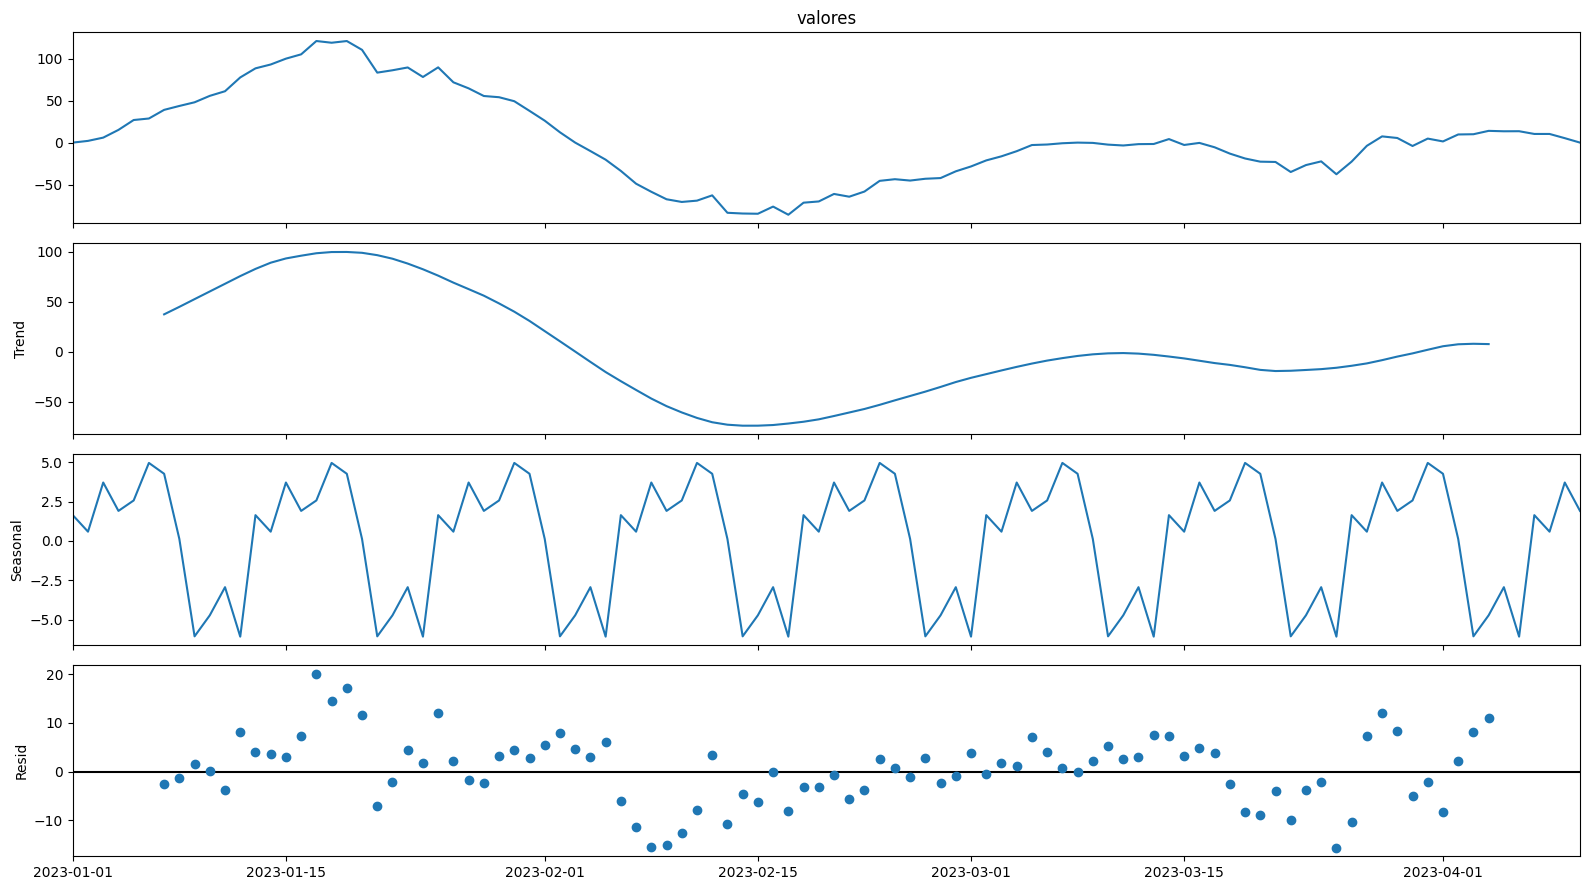

In [27]:
decomp = seasonal_decompose(df['valores'],model='additive',period=12)

fig = decomp.plot()
fig.set_size_inches((16,9))
fig.tight_layout()
